In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("/content/weather.csv",  index_col="DATE")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19287 non-null  object 
 1   NAME     19287 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14171 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19287 non-null  float64
 8   SNOW     19287 non-null  float64
 9   SNWD     19285 non-null  float64
 10  TAVG     6164 non-null   float64
 11  TMAX     19287 non-null  int64  
 12  TMIN     19287 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9669 non-null   float64
 16  WDF5     9586 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [4]:
null_val_percent = df.apply(pd.isnull).sum()/df.shape[0]
null_val_percent

,0
STATION,0.000000
NAME,0.000000
ACMH,0.501478
ACSH,0.501426
AWND,0.265256
FMTM,0.475087
PGTM,0.363872
PRCP,0.000000
SNOW,0.000000
SNWD,0.000104


In [5]:
# df.apply(pd.isnull).sum()

In [6]:
valid_col = df.columns[null_val_percent < .04]
valid_col

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [7]:
df = df[valid_col].copy()

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [10]:
df = df.ffill()

In [11]:
df.apply(pd.isnull).sum()

,0
station,0
name,0
prcp,0
snow,0
snwd,0
tmax,0
tmin,0


In [12]:
# df.apply(lambda x: (x == 9999).sum())

In [13]:
df.dtypes

,0
station,object
name,object
prcp,float64
snow,float64
snwd,float64
tmax,int64
tmin,int64


In [14]:
df.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
df.index.year.value_counts().sort_index()

,count
DATE,
1970,365
1971,365
1972,366
1973,365
1974,365
1975,365
1976,366
1977,365
1978,365


In [17]:
df.info()   # snow, snwd = snow depth on ground, PRCP = Precipitation, tmin, tmix = Is in inches

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19287 non-null  object 
 1   name     19287 non-null  object 
 2   prcp     19287 non-null  float64
 3   snow     19287 non-null  float64
 4   snwd     19287 non-null  float64
 5   tmax     19287 non-null  int64  
 6   tmin     19287 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ MB


<Axes: xlabel='DATE'>

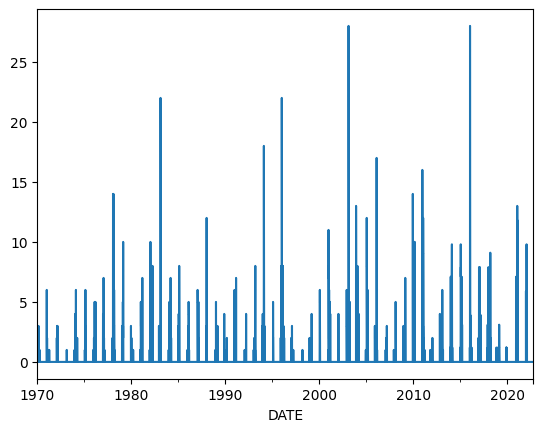

In [18]:
df["snwd"].plot()

In [19]:
# we are prediction tomorrow weather data.. If i have todat weather data what will be the tomorrow weather data

In [20]:
df["target"] = df.shift(-1)["tmax"]    # when we using ML algo.. we need to tell ml algo.. what we are tring to predict In our case we are predicting tomorrow weather data..
df

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [21]:
# we don't have data for 22 Oct so 21 Oct is empty target

In [22]:
df = df.ffill()    # It fill with previous target value
df

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [23]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

print(rr)

Ridge(alpha=0.1)


In [24]:
# df.corr()

In [25]:
predictors = df.columns[~df.columns.isin(["target", "name", "station"])]

In [26]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [27]:
def weather_model_test(weather, model, predictors, start=3650, step=90):   # start=3650-> Start with 1979 year remove first 10 year, step=90-> every 90 days groups
  all_predictions = []

  for i in range(start, weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]

    model.fit(train[predictors], train["target"])

    preds = model.predict(test[predictors])

    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test["target"], preds], axis=1)

    combined.columns = ["actual", "prediction"]

    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

    all_predictions.append(combined)
  return pd.concat(all_predictions)

In [28]:
predictions = weather_model_test(df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [29]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.139326679660841

In [30]:
predictions["diff"].mean()

5.139326679660841

In [31]:
predictions.sort_values("diff", ascending=False)    # predictions to improve our accuracy of over model

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.744725,28.255275
1999-01-02,53.0,25.911898,27.088102
1998-03-26,80.0,53.033957,26.966043
1985-04-18,84.0,57.071179,26.928821
1990-03-12,85.0,58.144310,26.855690
...,...,...,...
2006-08-20,88.0,88.002937,0.002937
2019-03-01,40.0,40.002460,0.002460
1992-06-11,76.0,76.001641,0.001641


In [32]:
pd.Series(rr.coef_, index=predictors)

,0
prcp,-1.236110
snow,-0.407827
snwd,0.053422
tmax,0.447413
tmin,0.517302
